## RBFによる関数近似

Copyright (c) 2022 Tadashi Wadayama  
Released under the MIT license  
https://opensource.org/licenses/mit-license.php

In [1]:
using LinearAlgebra
using Plots
gr()
using Random
Random.seed!(1)
using Flux

In [2]:
δ = 0.05
β = 20.0

20.0

In [3]:
function rbf_func(x, θ)
    rbf(x, β) = exp(-β*x^2)
    s = 0.0
    for i in 1:length(θ)
        s += θ[i]*rbf(x - δ*(i-1)+0.5, β)
    end
    return s
end

rbf_func (generic function with 1 method)

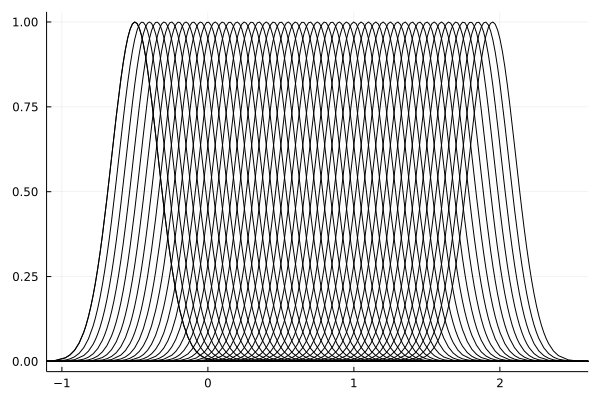

In [4]:
i=1
rbf(x, β) = exp(-β*x^2)
p1 = plot(x->rbf(x - δ*(i-1)+0.5, β), color=:black)
for i in 1:50
    plot!(x->rbf(x - δ*(i-1)+0.5, β), color=:black)
end
plot(p1, xlims=[-1,2.5], legend=false)

In [5]:
savefig("rbf_shape.pdf")

In [6]:
function Fit(T, N, θ)
    dx = T/N
    J = 0.0
    for i in 1:N
        u = rbf_func(i*dx, θ)      
        f = exp(-5*i*dx)*sin(5*i*dx)
        J += (u - f)^2
    end
    return J
end

Fit (generic function with 1 method)

## 学習過程

In [11]:
N = 100
T = 1.0
opt = ADAM(1.0) 
θ_train = ones(50)
train_itr = 250

function train(T, N, θ)
    ps = Flux.params(θ)
    for i in 1:train_itr
        gs = gradient(ps) do
            Fit(T, N, θ)
        end
        Flux.Optimise.update!(opt, ps, gs)
        println(Fit(T, N, θ))
    end
end

train (generic function with 2 methods)

In [12]:
train(T, N, θ_train)

2.4997578471958857
2845.7194053544927
3390.9065418428304
1407.2097950870061
52.02235742724382
468.8533236227985
1518.1663475754842
1704.4774130892426
969.6187185454039
183.37299100209358
38.08400969821741
479.4744380618602
894.9071849075933
833.9267830002452
409.5848850755628
50.71627585508385
46.55057749441282
305.85350224532505
501.6293841100514
430.2042811513776
185.55934525815238
12.04782495904644
46.314676320184574
201.4467776936629
285.72670925037136
212.25888899952997
68.77975461300782
0.0828802368349175
52.64598070040724
141.165305825307
157.27335026336868
87.7487505737868
13.223807595283159
7.3223352337254655
58.27013698008673
94.40991559238056
72.67958477050931
22.195950193435376
0.13309123454310418
22.549624165704625
52.182973553513655
49.818025808188104
20.48554834177609
0.5193928244411755
9.422003294437088
29.032556085595395
31.402948597439913
14.540209315003327
0.721508321222973
4.922922131274749
17.16716586316831
19.089604659726877
8.71205250426416
0.3464805127462456
3.4

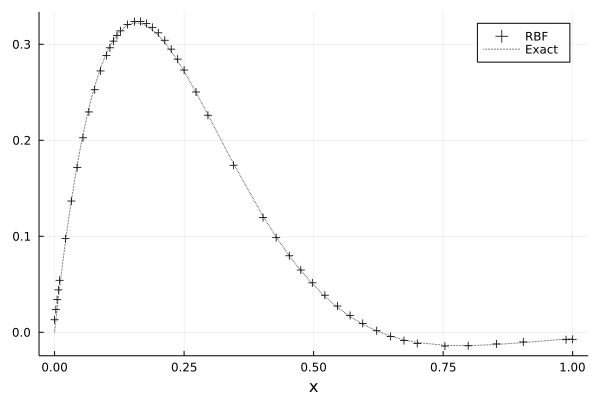

In [13]:
scatter(x->rbf_func(x, θ_train),  lw=1, xlims=[0,1],label="RBF", xlabel="x",color=:black, marker=:+)
plot!(x->exp(-5*x)*sin(5*x), lw=1, label="Exact",color=:black, ls=:dot)

In [10]:
savefig("rbf.pdf")